# Phase 1: EDA & Data Pre-processing 

**Author: Shreya Das**

In this notebook we will be exploring a dataset from kaggle (https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images), that includes histological images of colon and lung cancer. Our goal is to build a CNN model to be able to identify the different histological classes and determine the type of cancer. This dataset has 5 classes: Colon Adenocarcinoma, Colon Benign Tissue, Lung Adenocarcinoma, Lung Benign Tissue, and Lung Squamous Cell Carcinoma. Because this has 5 classes, this is a bit more complex than the binary classification case.

In this first phase we will be exploring the dataset and then, preform data pre-processing to make it more accessible for the CNN model that we will build in the next phase.

Original Paper: Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

## 0 Creating a Virtual Environment
Using a virtual environment helps containerize all the dependencies and libraries requires for this notebook. Installing the dependencies in a virtual environment means that these dependencies will not be downloaded in your local device.

In [2]:
# Create the virtual environment using terminal in VS code. If you aren't using VS code, locate the terminal in your coding environment. Here the virtual environment is name env
# !python -m venv env 

In [3]:
# Activate the virtual environment. Once the virtual environment is activated, in terminal you should see (env) at the beginning of the current line in terminal
# !source env/bin/activate

## 1.0 Exploratory Data Analysis
First we are going to explore the dataset a little further. Since this is a image based dataset, EDA is a little different from most numerical-based datasets. 

### 1.1 Exploring Number of images per Diagnosis Class

One of the important things to do is understand how many images we have in each class. To do this, we will create a dictionary with the class name as a key and the number of images in each image class as the value.

First we need to download some other dependencies like os.

In [4]:
import os

In [5]:
diagnosis = {
    'Colon adenocarcinoma': len(os.listdir('data/colon_image_sets/colon_aca')),
    'Colon benign tissue': len(os.listdir('data/colon_image_sets/colon_n')),
    'Lung adenocarcinoma': len(os.listdir('data/lung_image_sets/lung_aca')),
    'Lung benign tissue': len(os.listdir('data/lung_image_sets/lung_n')),
    'Lung squamous cell carcinoma': len(os.listdir('data/lung_image_sets/lung_scc'))
}

We will now use a barplot to display the number of images per class.

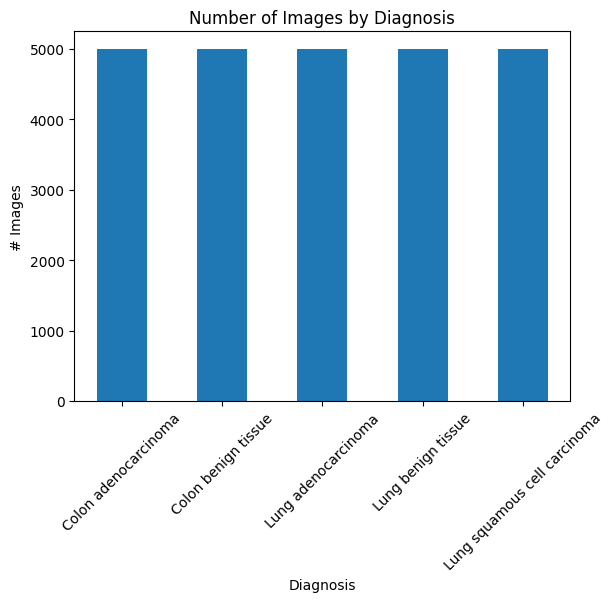

In [6]:
import matplotlib.pyplot as plt

plt.bar(diagnosis.keys(), diagnosis.values(), width = .5)
plt.title("Number of Images by Diagnosis")
plt.xlabel('Diagnosis')
plt.xticks(rotation = 45)
plt.ylabel('# Images')

plt.savefig('EDA_graph')
plt.show()

Interestingly enough, all classes have 5000 images. This is good since we know that there will be no imbalance in the data for each class. This reduces the chance of bias in the CNN model.

### 1.2 Checking Image Sizes

Next we are going to check the image sizes. When doing image classifier based CNNs, we need to make sure all the images in our dataset have the same size to ensure efficient calculations by the NNs. 

We will plot the height and width of the images in a scatter plot. First we grab the height and width of the images using a function that we define get_dims() (we will use the same dictionary as above). 

In [7]:
# Install Pillow in terminal
# !pip instal pillow

In [8]:
from PIL import Image
import numpy as np

def get_dims(file):
    # Returns the dimensions of an image
    img = Image.open(file)

    arr = np.array(img)

    h,w,d = arr.shape

    return h, w

In [9]:
# Install Dask library in terminal. This will allow us to use a bag data type
# !conda install dask

In [ ]:
import dask.bag as bag
import pandas as pd

for n,d in diagnosis.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnosis.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height')
        plt.title('Image Sizes (pixels) | {}'.format(n))